In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") 
%matplotlib inline

In [2]:
# get pos fullform using url
import requests
url = 'https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html'
html = requests.get(url).content
df_pos = pd.read_html(html,skiprows=0,header=0)[0]

In [3]:
import nltk
from nltk.corpus import words,wordnet
nltk.download('words')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package words to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
! pip install wordninja

    100% |████████████████████████████████| 542kB 2.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for wordninja ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/c3/f8/19/c739a55c5967907864764fea6723ca5bf9dd435eed7b03cbfb
Successfully built wordninja
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import wordninja

In [6]:
! pip install autocorrect

    100% |████████████████████████████████| 3.6MB 329kB/s eta 0:00:01
  Running setup.py bdist_wheel for autocorrect ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/bf/b8/ae/704d5643f1d0637c5b87d9feccf2ee923c492b703bb0bfbb19
Successfully built autocorrect
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
from autocorrect import spell

In [8]:
# Build the dictionary foo english words
print(len(words.words()))
print(len(wordninja.words))

236736
126136


In [9]:
wordlists = set(words.words() + wordninja.words)
print(len(wordlists)) #Final english word dictionary

322847


In [10]:
from difflib import SequenceMatcher
SequenceMatcher(a = 'installation',b='instillation').ratio() #Levenshtein distance

0.9166666666666666

In [11]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk import pos_tag

In [12]:
# function to identify the part of speech
def check(word,pos='n'):
    word = word.lower()
    stemmer = PorterStemmer()
    print(stemmer.stem(word))
    
    lemmatizer = WordNetLemmatizer()
    print(lemmatizer.lemmatize(word,pos=pos)) 
    
    print(pos_tag([word]) )

# Function to only lemmatize Nouns and Verb tense
def custom_lemma(word):
    if pos_tag([word])[0][1] in ['NNS']:
        lemmatizer = WordNetLemmatizer()
        return(lemmatizer.lemmatize(word,pos='n'))
    elif pos_tag([word])[0][1] in ['VBN','VBD','VBZ','VBG','NNS']:
        lemmatizer = WordNetLemmatizer()
        return(lemmatizer.lemmatize(word,pos='v'))
    else:
        return(word)

In [13]:
# Function to replace all us word to gp words
import json

with open("us_to_gp_word_dict.json", 'r') as fp:
    mydict = json.load(fp)

# with open('us_gb_word_new.json', 'r') as fp:
#     mydict = json.load(fp)
    
fp.close()

In [14]:
mydict.update({'optimisation':'optimization','optimization':'optimization'})

def replace_all(text, mydict):
    for gb, us in mydict.items():
        text = text.replace(gb,us)
    return text

### Load Data

In [40]:
df = pd.read_csv('PreProcessed_Clean_Data.csv')

In [17]:
df.shape

(199203, 20)

In [18]:
df.X_ISP_SR_TITLE.nunique()

56328

In [19]:
df.input_data.nunique()

116342

In [20]:
df.auto_log_article_title.nunique() # No.Of Article Title

93

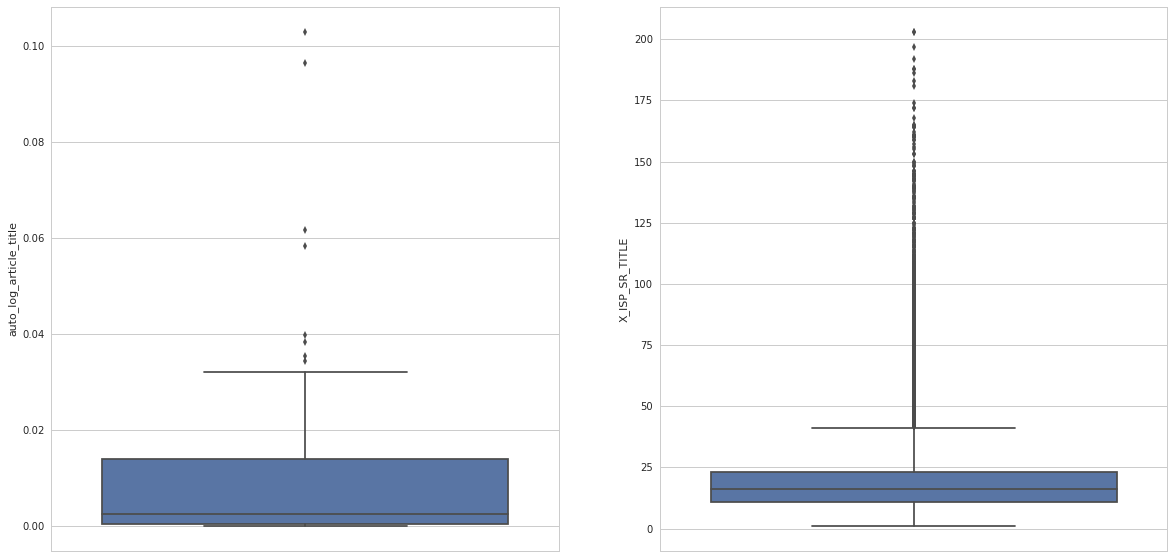

In [34]:
plt.figure(figsize=(20,10))
# Article title distribution
plt.subplot(1,2,1)
sns.set_style(style='whitegrid')
sns.boxplot(df.auto_log_article_title.value_counts()/df.shape[0], orient='v')

# X_ISP_SR_TITLE Length distribution
plt.subplot(1,2,2)
sns.set_style(style='whitegrid')
sns.boxplot(df.X_ISP_SR_TITLE.str.len(), orient='v')

### Preprocessing

In [26]:
! pip install unidecode

    100% |████████████████████████████████| 245kB 2.3MB/s ta 0:00:011
You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [46]:
from unidecode import unidecode
df.X_ISP_SR_TITLE = df.X_ISP_SR_TITLE.apply(lambda k: unidecode(str(k))) # replace ancient characters

In [47]:
# PERFORME THE COUNTVECTORIZE
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = CountVectorizer(stop_words='english',min_df=2)
vectorizer.fit(df.X_ISP_SR_TITLE)

X = vectorizer.transform(df.X_ISP_SR_TITLE)
print(X.toarray().shape, df.shape)

(199203, 3309) (199203, 20)


In [48]:
# Word not in english dictionary
word_notin_list = []
for i in vectorizer.get_feature_names():
    if i not in wordlists:
        word_notin_list.append(i)

len(word_notin_list)

word_notin_list.sort(key=len)

In [50]:
[word for word in word_notin_list if len(word)>14]

['multipleservice',
 'slowperformance',
 'vangogh15bdwfbtx',
 'nobootdevicefound',
 'systemmodelvostro',
 'wirelessconnection',
 'pluggedinnotcharging']

In [49]:
# Word not in english dictionary
word_in_list = []
for i in vectorizer.get_feature_names():
    if i not in word_notin_list:
        word_in_list.append(i)
        
word_in_list.sort(key=len,reverse=True)

In [51]:
[word for word in word_in_list if len(word)>14]

['personalization', 'troubleshooting']

In [54]:
print("Major Treatment: {0}, Minor Treatment: {1}".format(len(word_notin_list),len(word_notin_list)))

Major Treatment: 1028, Minor Treatment: 1028


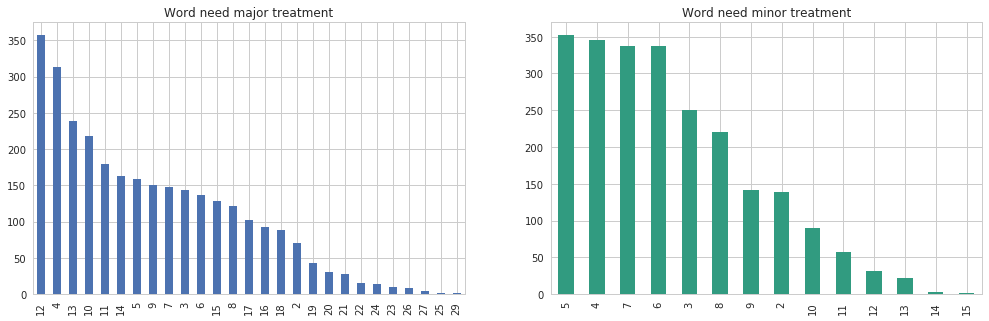

In [31]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
pd.Series(word_notin_list).str.len().value_counts().plot(kind='bar',title='Word need major treatment')
plt.subplot(1,2,2)
pd.Series(word_in_list).str.len().value_counts().plot(kind='bar',title = 'Word need minor treatment',color='#319b80') # word length

In [58]:
words_xyz = []

for i in word_in_list:
    if i in mydict.keys():
        x = mydict[i]
    else:
        x = i
    words_xyz.append(x)

In [59]:
print(len(word_in_list))
print(len(set(words_xyz)))

2281
2278


In [1743]:
# word_in_list_copy = word_in_list
# word_in_list = words_xyz

### Preprocess Long characters
* . First process for word in english
* . Second process for word not in english

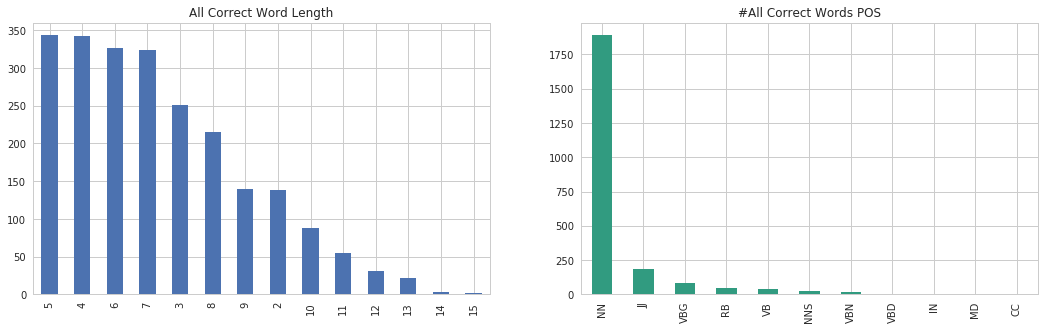

In [61]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
pd.Series(word_in_list).str.len().value_counts().plot(kind='bar',title='All Correct Word Length') # word length

plt.subplot(1,2,2)
pd.Series(word_in_list).apply(lambda x: pos_tag([x])[0][1]).value_counts().plot(kind='bar',color='#319b80',title='#All Correct Words POS') # word length

In [62]:
# Calculate cosine similarities
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = text.lower()
    return Counter(words) 

In [67]:
long_words= [i for i in word_in_list if len(i)>11]  # Threshold is 11
long_words = list(set([spell(i) for i in long_words]))
len(long_words)

58

In [68]:
long_words_lemma = list(set([custom_lemma(i) for i in long_words]))
long_words_lemma.sort()
len(long_words_lemma)

56

In [69]:
# Create dataframe for later use
finaldf = pd.DataFrame({'word':long_words})
finaldf['word_lemmatize'] = finaldf.word.apply(lambda x: custom_lemma(x))

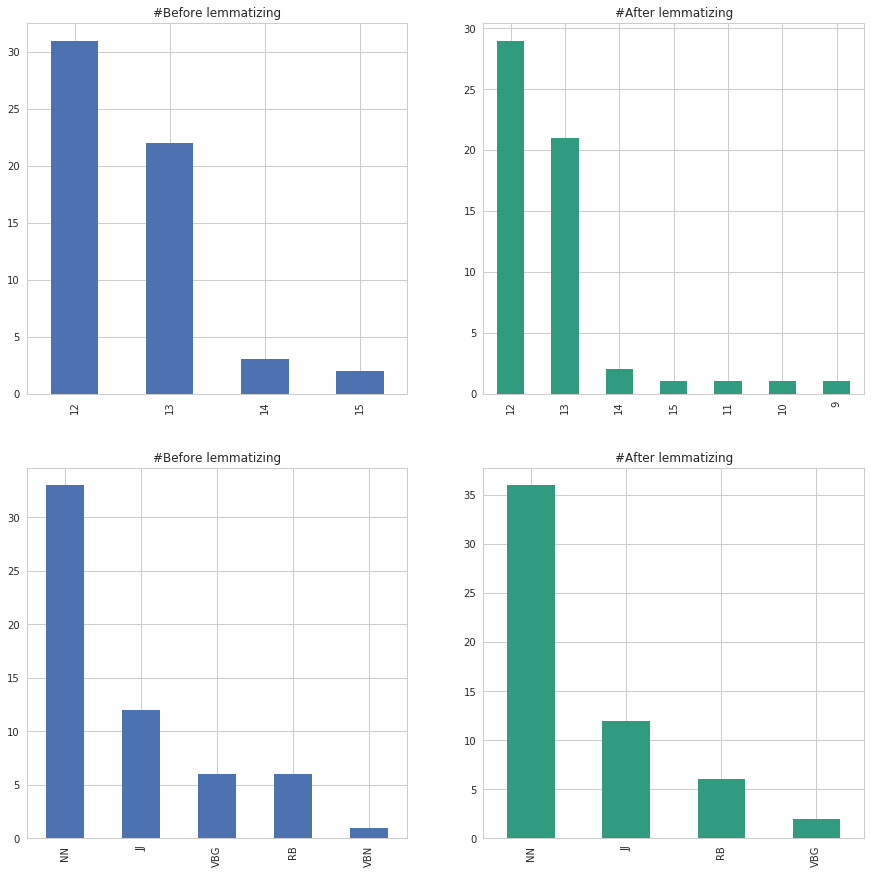

In [70]:
plt.figure(figsize=(15,15))

# Before lemmatizing
plt.subplot(2,2,1)
pd.Series(long_words).str.len().value_counts().plot(kind='bar',title='#Before lemmatizing') # word length of long words

# After lemmatizing
plt.subplot(2,2,2)
pd.Series(long_words_lemma).str.len().value_counts().plot(kind='bar',color='#319b80',title ='#After lemmatizing' ) # word length of long words

# Before lemmatizing
plt.subplot(2,2,3)
pd.Series(long_words).apply(lambda x: pos_tag([x])[0][1]).value_counts().plot(kind='bar',title='#Before lemmatizing') # word length

# After lemmatizing
plt.subplot(2,2,4)
pd.Series(long_words_lemma).apply(lambda x: pos_tag([x])[0][1]).value_counts().plot(kind='bar', color='#319b80',title='#After lemmatizing') # word length

In [71]:
def calc_scores(text1,text2):
    return(get_cosine(text_to_vector(text1),text_to_vector(text2)))

t = np.array([calc_scores(i,j) for i in long_words_lemma for j in long_words_lemma])

t.shape = (len(long_words_lemma),len(long_words_lemma))

In [72]:
labels = np.array(np.diag(long_words_lemma[:20]).tolist())

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5]),
 <a list of 40 Text yticklabel objects>)

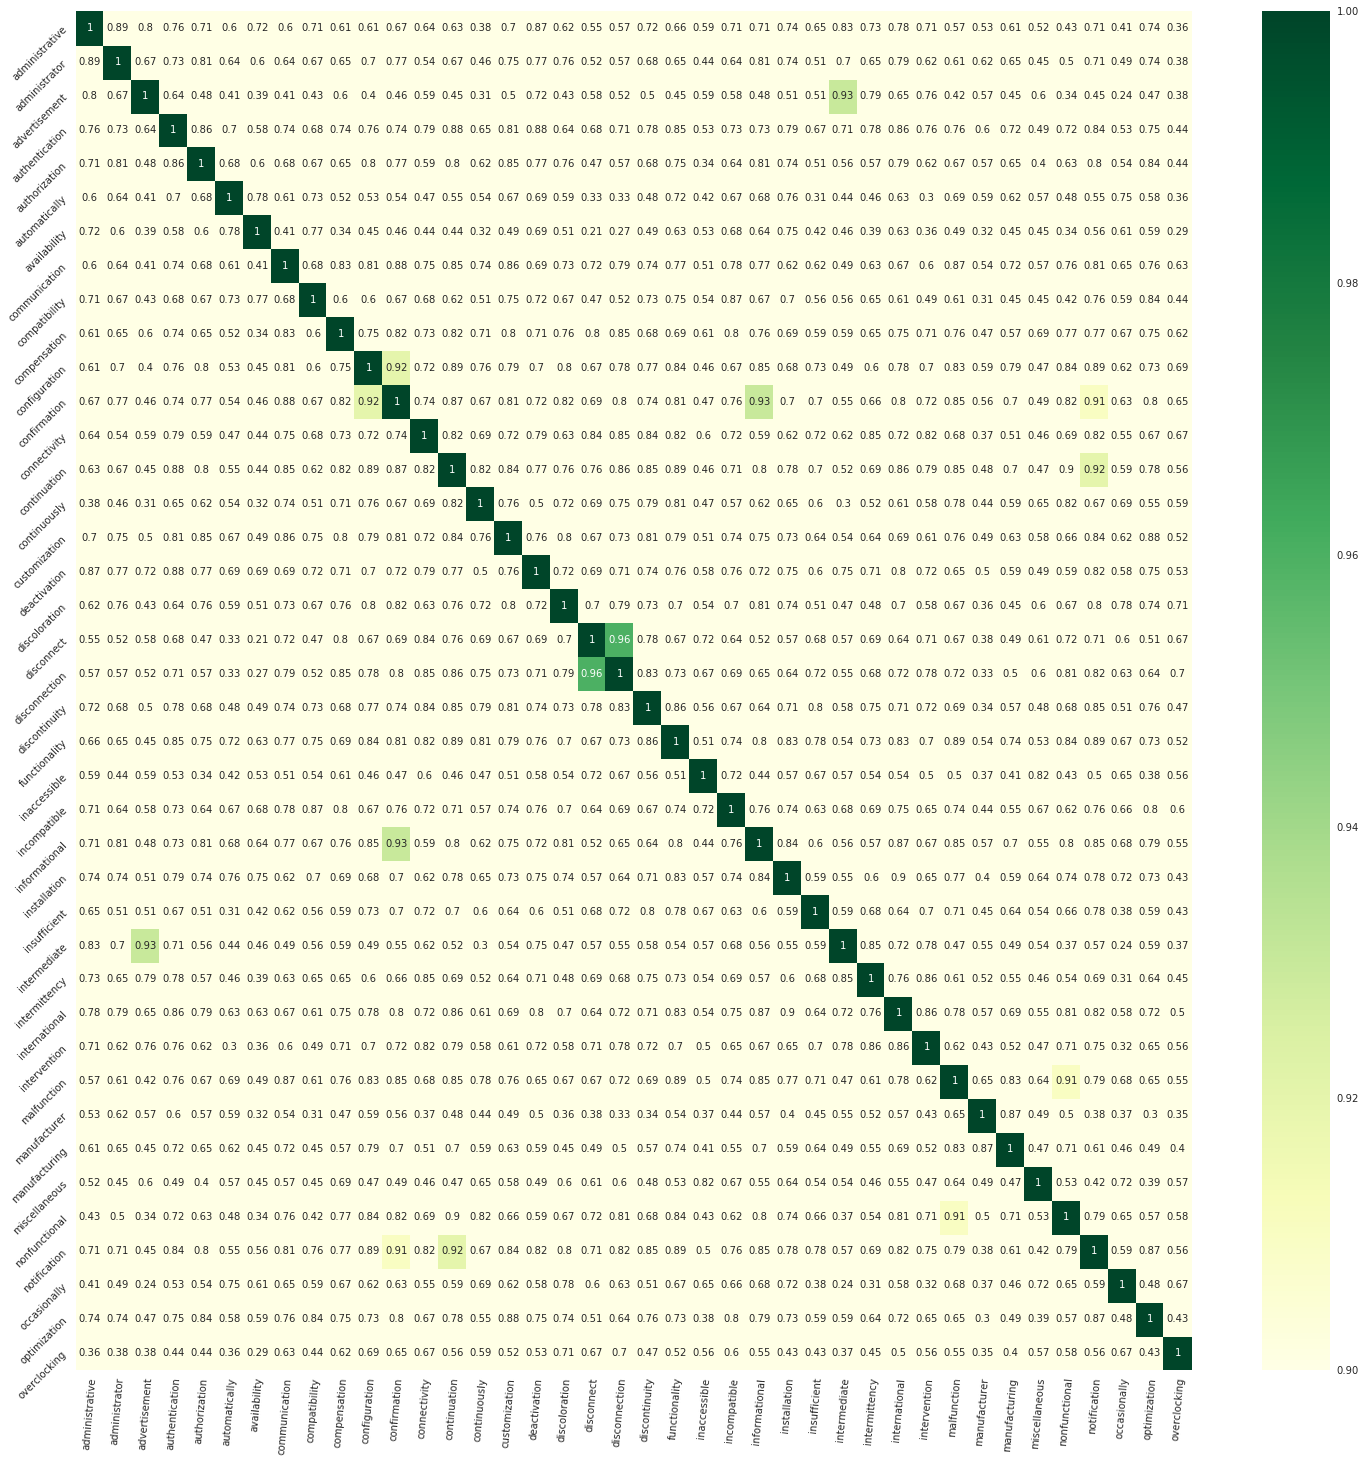

In [73]:
plt.figure(figsize = (25,25))
# sns.set(font_scale=0.8)
sns.heatmap((pd.DataFrame(t,index=long_words_lemma,columns=long_words_lemma).round(2)).iloc[:40,:40],vmin=0.90,cmap='YlGn',annot=True)#,annot=labels,fmt='',)
plt.xticks(rotation=85)
plt.yticks(rotation=45)

In [1755]:
# l = long_words[:10]
# x = []
# for i in range(0,10):
#     # print(list(range(i,5)))
#     x.append([l[i] for i in range(i,10)]+list(repeat(0, i)))

In [77]:
short_words= [i for i in word_in_list if 4<len(i.strip()) < 11]
print(len(short_words))

1437


In [78]:
short_words_lemma = list(set([custom_lemma(i) for i in short_words]))
short_words_lemma.sort()
print(len(short_words_lemma))

1393


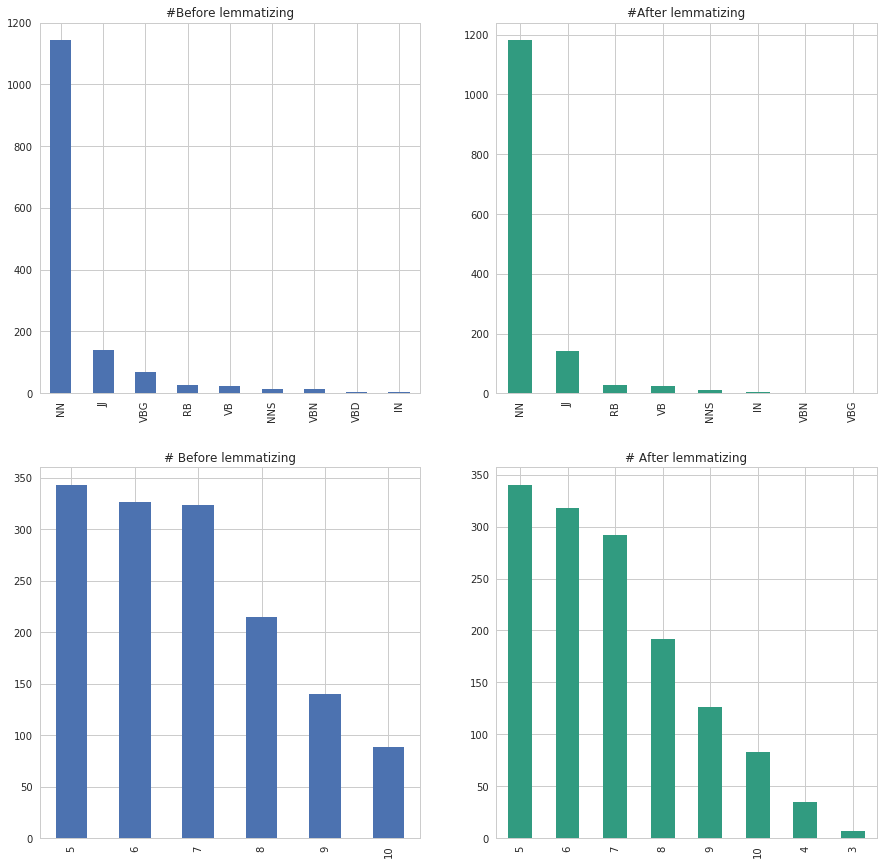

In [79]:
plt.figure(figsize=(15,15))
# Before lemmatizing
plt.subplot(2,2,1)
pd.Series(short_words).apply(lambda x: pos_tag([x])[0][1]).value_counts().plot(kind='bar',title='#Before lemmatizing') # word length

# After lemmatizing
plt.subplot(2,2,2)
pd.Series(short_words_lemma).apply(lambda x: pos_tag([x])[0][1]).value_counts().plot(kind='bar',title= '#After lemmatizing',color='#319b80') # word length


# Before lemmatizing
plt.subplot(2,2,3)
pd.Series(short_words).str.len().value_counts().plot(kind='bar', title='# Before lemmatizing').set # word length

# After lemmatizing
plt.subplot(2,2,4)
pd.Series(short_words_lemma).str.len().value_counts().plot(kind='bar',color='#319b80',title='# After lemmatizing') # word length

In [80]:
short_words.sort(key=len)

In [81]:
finaldf.head()

,word,word_lemmatize
0,overclocking,overclocking
1,notification,notification
2,troubleshooting,troubleshoot
3,administrator,administrator
4,uncorrectable,uncorrectable


In [82]:
df_test = pd.concat([pd.Series(short_words).apply(lambda x: custom_lemma(x)),
                     pd.concat([pd.Series(short_words),pd.Series(short_words).apply(lambda x: pos_tag([x])[0][1])],axis=1)],axis=1)

In [83]:
df_test.columns = ['word_lemmatize','word','pos']

In [84]:
df_test = df_test[['word','word_lemmatize']]

In [85]:
finaldf = pd.concat([finaldf,df_test],axis=0)

In [90]:
finaldf.reset_index(inplace=True,drop=True)

In [91]:
finaldf.shape

(1495, 2)

In [87]:
print('#Before Cleaning',len(word_in_list))
print('\n')
print('#Before Lemmatizing length Long words:{0}, Short Words:{1}'.format(len(long_words),len(short_words)))
print('\n')
print('#After Lemmatizing length Long words:{0}, Short Words:{1}'.format(len(long_words_lemma),len(short_words_lemma)))
print('\n')
print('#After Cleaning',finaldf.shape[0])

#Before Cleaning 2281


#Before Lemmatizing length Long words:58, Short Words:1437


#After Lemmatizing length Long words:56, Short Words:1393


#After Cleaning 1495


In [94]:
print('Garbage words',len([i for i in word_in_list if len(i.strip()) < 4]))
print([i for i in word_in_list if len(i.strip()) < 4])

Garbage words 389
['acc', 'act', 'add', 'aga', 'age', 'ago', 'aio', 'air', 'alt', 'amc', 'amd', 'anc', 'anz', 'aol', 'arb', 'arc', 'arg', 'ask', 'aso', 'avg', 'bad', 'bar', 'bbb', 'bcc', 'bcd', 'ber', 'big', 'bin', 'bit', 'boa', 'boo', 'bot', 'box', 'btn', 'bug', 'buy', 'cac', 'cad', 'cam', 'car', 'cds', 'cha', 'cid', 'cis', 'cnr', 'coz', 'cpu', 'cut', 'dan', 'day', 'ddd', 'ddl', 'ddp', 'dec', 'del', 'dep', 'dia', 'die', 'dim', 'dll', 'dns', 'doc', 'doe', 'dog', 'dot', 'dpc', 'dsp', 'dss', 'dvd', 'ear', 'end', 'ent', 'ert', 'esc', 'esp', 'est', 'eta', 'ews', 'exe', 'ext', 'eye', 'fan', 'faq', 'fax', 'fce', 'fee', 'fir', 'fit', 'fix', 'fox', 'fps', 'fur', 'gem', 'gen', 'ghz', 'gps', 'gui', 'hip', 'hmm', 'hro', 'htc', 'hub', 'hum', 'ibc', 'imp', 'ink', 'int', 'ion', 'irc', 'iso', 'isp', 'jam', 'jay', 'jet', 'jim', 'job', 'jon', 'jpg', 'ken', 'key', 'kit', 'lac', 'lag', 'lan', 'lcd', 'led', 'let', 'lid', 'lit', 'log', 'lol', 'los', 'lot', 'low', 'mac', 'mal', 'map', 'max', 'mbr', 'mfc', '

In [1764]:
df_test2 = pd.DataFrame(t,index=long_words_lemma,columns=long_words_lemma).round(2)
df_test2[df_test2>=1.00] =0

In [1765]:
df_test2.head()

,accidentally,administration,administrator,advertisement,application,authorization,automatically,availability,cancellation,communicate,...,specification,subscription,transfer,transition,troubleshoot,unauthorized,unidentified,uninstalling,unresponsive,verification
accidentally,0.00,0.55,0.51,0.51,0.69,0.46,0.79,0.69,0.90,0.61,...,0.62,0.35,0.37,0.47,0.26,0.44,0.48,0.60,0.28,0.56
administration,0.55,0.00,0.94,0.64,0.71,0.81,0.61,0.65,0.61,0.61,...,0.73,0.69,0.56,0.93,0.39,0.63,0.68,0.71,0.51,0.79
administrator,0.51,0.94,0.00,0.67,0.64,0.81,0.64,0.60,0.54,0.56,...,0.62,0.65,0.69,0.87,0.49,0.64,0.53,0.56,0.46,0.72
advertisement,0.51,0.64,0.67,0.00,0.37,0.48,0.41,0.39,0.49,0.56,...,0.52,0.44,0.69,0.60,0.44,0.58,0.67,0.42,0.67,0.62
application,0.69,0.71,0.64,0.37,0.00,0.69,0.71,0.71,0.76,0.56,...,0.79,0.61,0.31,0.67,0.33,0.45,0.45,0.62,0.40,0.69


In [1768]:
xdt = df_test2.idxmax(axis=1)
xdt = pd.DataFrame(xdt)
xdt.reset_index(inplace=True)
xdt.columns=['Indices', 'Indices2']

In [1779]:
xdt['Indices_gb'] = xdt.Indices.apply(lambda xyz: replace_all(xyz,mydict=mydict))

In [1770]:
#Get Scores Again
xdt["Score_SeqMatcher"] = xdt.apply(lambda row: SequenceMatcher(a=row['Indices'],b=row['Indices2']).ratio(),axis=1)
xdt["Score_Cosine"] = xdt.apply(lambda row: get_cosine(vec1=text_to_vector(row['Indices']),vec2=text_to_vector(row['Indices2'])),axis=1)

In [1771]:
# Negatvie Prefixes ["de",'dis','in',"il","im",'ir','mis','non','un']
xdt['Prefix'] = xdt.Indices.apply(lambda word:'negative' 
                                  if word.startswith(("de",'dis','in',"il","im",'ir','mis','non','un')) 
                                  else('again' if word.startswith(('re')) else 'nothing'))

In [1772]:
# replace word with iz to is
xdt['check_replacement'] = xdt.Indices.apply(lambda x: replace_all(str(x), mydict) if x in mydict.keys() else 0)

In [1780]:
xdt[xdt.Score_SeqMatcher>0.900000]

,Indices,Indices2,Indices_gb,Score_SeqMatcher,Score_Cosine,Prefix,check_replacement
27,installation,instillation,installation,0.916667,0.957427,negative,0
28,instillation,installation,installation,0.916667,0.957427,negative,0
33,intermittent,intermittently,intermittent,0.923077,0.968246,negative,0
34,intermittently,intermittent,intermittently,0.923077,0.968246,negative,0
48,reinstallation,installation,reinstallation,0.923077,0.957427,again,0


*__ Till yet completed the cleaning for words which are in english and form dictionary__*

*__ Lets Clean Word which are not-in english__*

In [95]:
print(len(word_notin_list))

1028


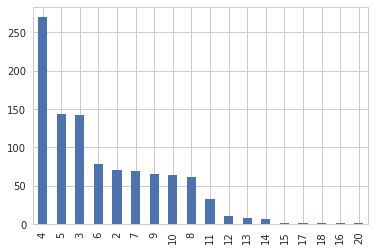

In [96]:
pd.Series(word_notin_list).str.len().value_counts().plot(kind='bar')

### Treatment of < 10 character words

In [97]:
print(df.input_data[df.input_data.str.contains('carregame')].tolist())

[]


In [98]:
char = [spell(i) for i in word_notin_list if len(i)>10]

In [105]:
print(char)

['0xc00000034', '0xc0000021a', 'alienware15', 'blackscreen', 'connectivity', 'connection', 'displaying', 'displayport', 'funcionando', 'hibernation', 'information', 'installation', 'intermittent', 'maintained', 'maintenance', 'maintenance', 'maintenance', 'malwarebyte', 'motherboard', 'performance', 'performance', 'performance', 'performance', 'powerbutton', 'rendimiento', 'restauracao', 'screensaver', 'solventamos', 'sr957353938', 'subscription', 'systemmodel', 'treinamento', 'walkthrough', 'autoshutdown', 'Breckenridge', 'dellhardware', 'driverupdate', 'inspiron3567', 'maintenance', 'monitorissue', 'multimonitor', 'performance', 'photogallery', 'proclientggn', 'calentamiento', 'dali15kblfbtx', 'distorcionado', 'maintainenace', 'microsoftedge', 'proplusclient', 'supportassist', 'windowsupdate', 'dockingstation', 'randomshutdown', 'slowperformace', 'installation', 'vegas14kblfbtx', 'vegas15kblfbtx', 'windowsfeature', 'multipleservice', 'slowperformance', 'vangogh15bdwfbtx', 'nobootdevi

In [99]:
d12 = pd.concat([pd.Series(char,name='word'),
           pd.Series(char,name='word2').apply(lambda x: wordninja.split(x)).apply(lambda x: " ".join([i for i in x if len(i)>=3]))
          ],axis=1)

In [106]:
d12

,word,word2
0,0xc00000034,00000034
1,0xc0000021a,0000021
2,alienware15,alien ware
3,blackscreen,black screen
4,connectivity,connectivity
5,connection,connection
6,displaying,displaying
7,displayport,display port
8,funcionando,fun cio nando
9,hibernation,hibernation


In [100]:
# dq = pd.read_csv("wordsample2.csv")
# dq.columns = ["word",'word_lemmatize']
# finaldf = pd.concat([finaldf,dq],axis=0)
#finaldf.reset_index(drop=True,inplace=True)

In [101]:
x =[]
for i in d12.word2:
    x.extend(i.split())

In [102]:
x = list(set(x))

In [104]:
print(x)

['connectivity', '3567', 'through', 'black', 'pro', 'ace', 'maintenance', 'lent', 'motherboard', 'client', 'auto', 'random', 'van', 'performance', 'tre', 'ware', 'assist', 'monitor', 'edge', 'hibernation', 'gogh', 'byte', 'iron', 'displaying', 'walk', 'malware', 'Bre', 'dali', 'maintained', 'shutdown', 'orci', 'support', 'perform', 'tro', 'button', 'photo', 'aura', 'docking', 'boot', 'power', 'men', 'update', 'nando', '957353938', 'issue', 'intermittent', 'subscription', 'information', 'rest', 'fun', 'mien', 'system', 'hardware', 'solvent', 'charging', 'cao', 'cken', 'saver', 'found', 'screen', 'feature', '0000021', 'driver', 'wireless', 'microsoft', 'vos', 'ridge', 'port', 'model', 'maintain', 'station', 'connection', 'device', 'multi', 'gallery', 'service', 'alien', 'vegas', 'cio', 'display', 'windows', 'dist', 'dell', 'plus', 'rend', 'plugged', 'installation', 'multiple', 'amos', '00000034', 'not', 'slow']


In [1851]:
# pd.concat([pd.Series(x,name='word'),pd.Series([calc_scores('support',i) for i in x],name='Score')],axis=1).sort_values('Score',ascending=False)

In [1857]:
x  = [spell(i) for i in word_notin_list if 7<len(i)<10]

In [107]:
print(len(x))
print(len(set(x)))

92
92


In [108]:
t = np.array([calc_scores(i,j) for i in x for j in x])
t.shape = (len(x),len(x))

In [109]:
df_test2 = pd.DataFrame(t,index=x,columns=x).round(2)
df_test2[df_test2>=1.00] =0

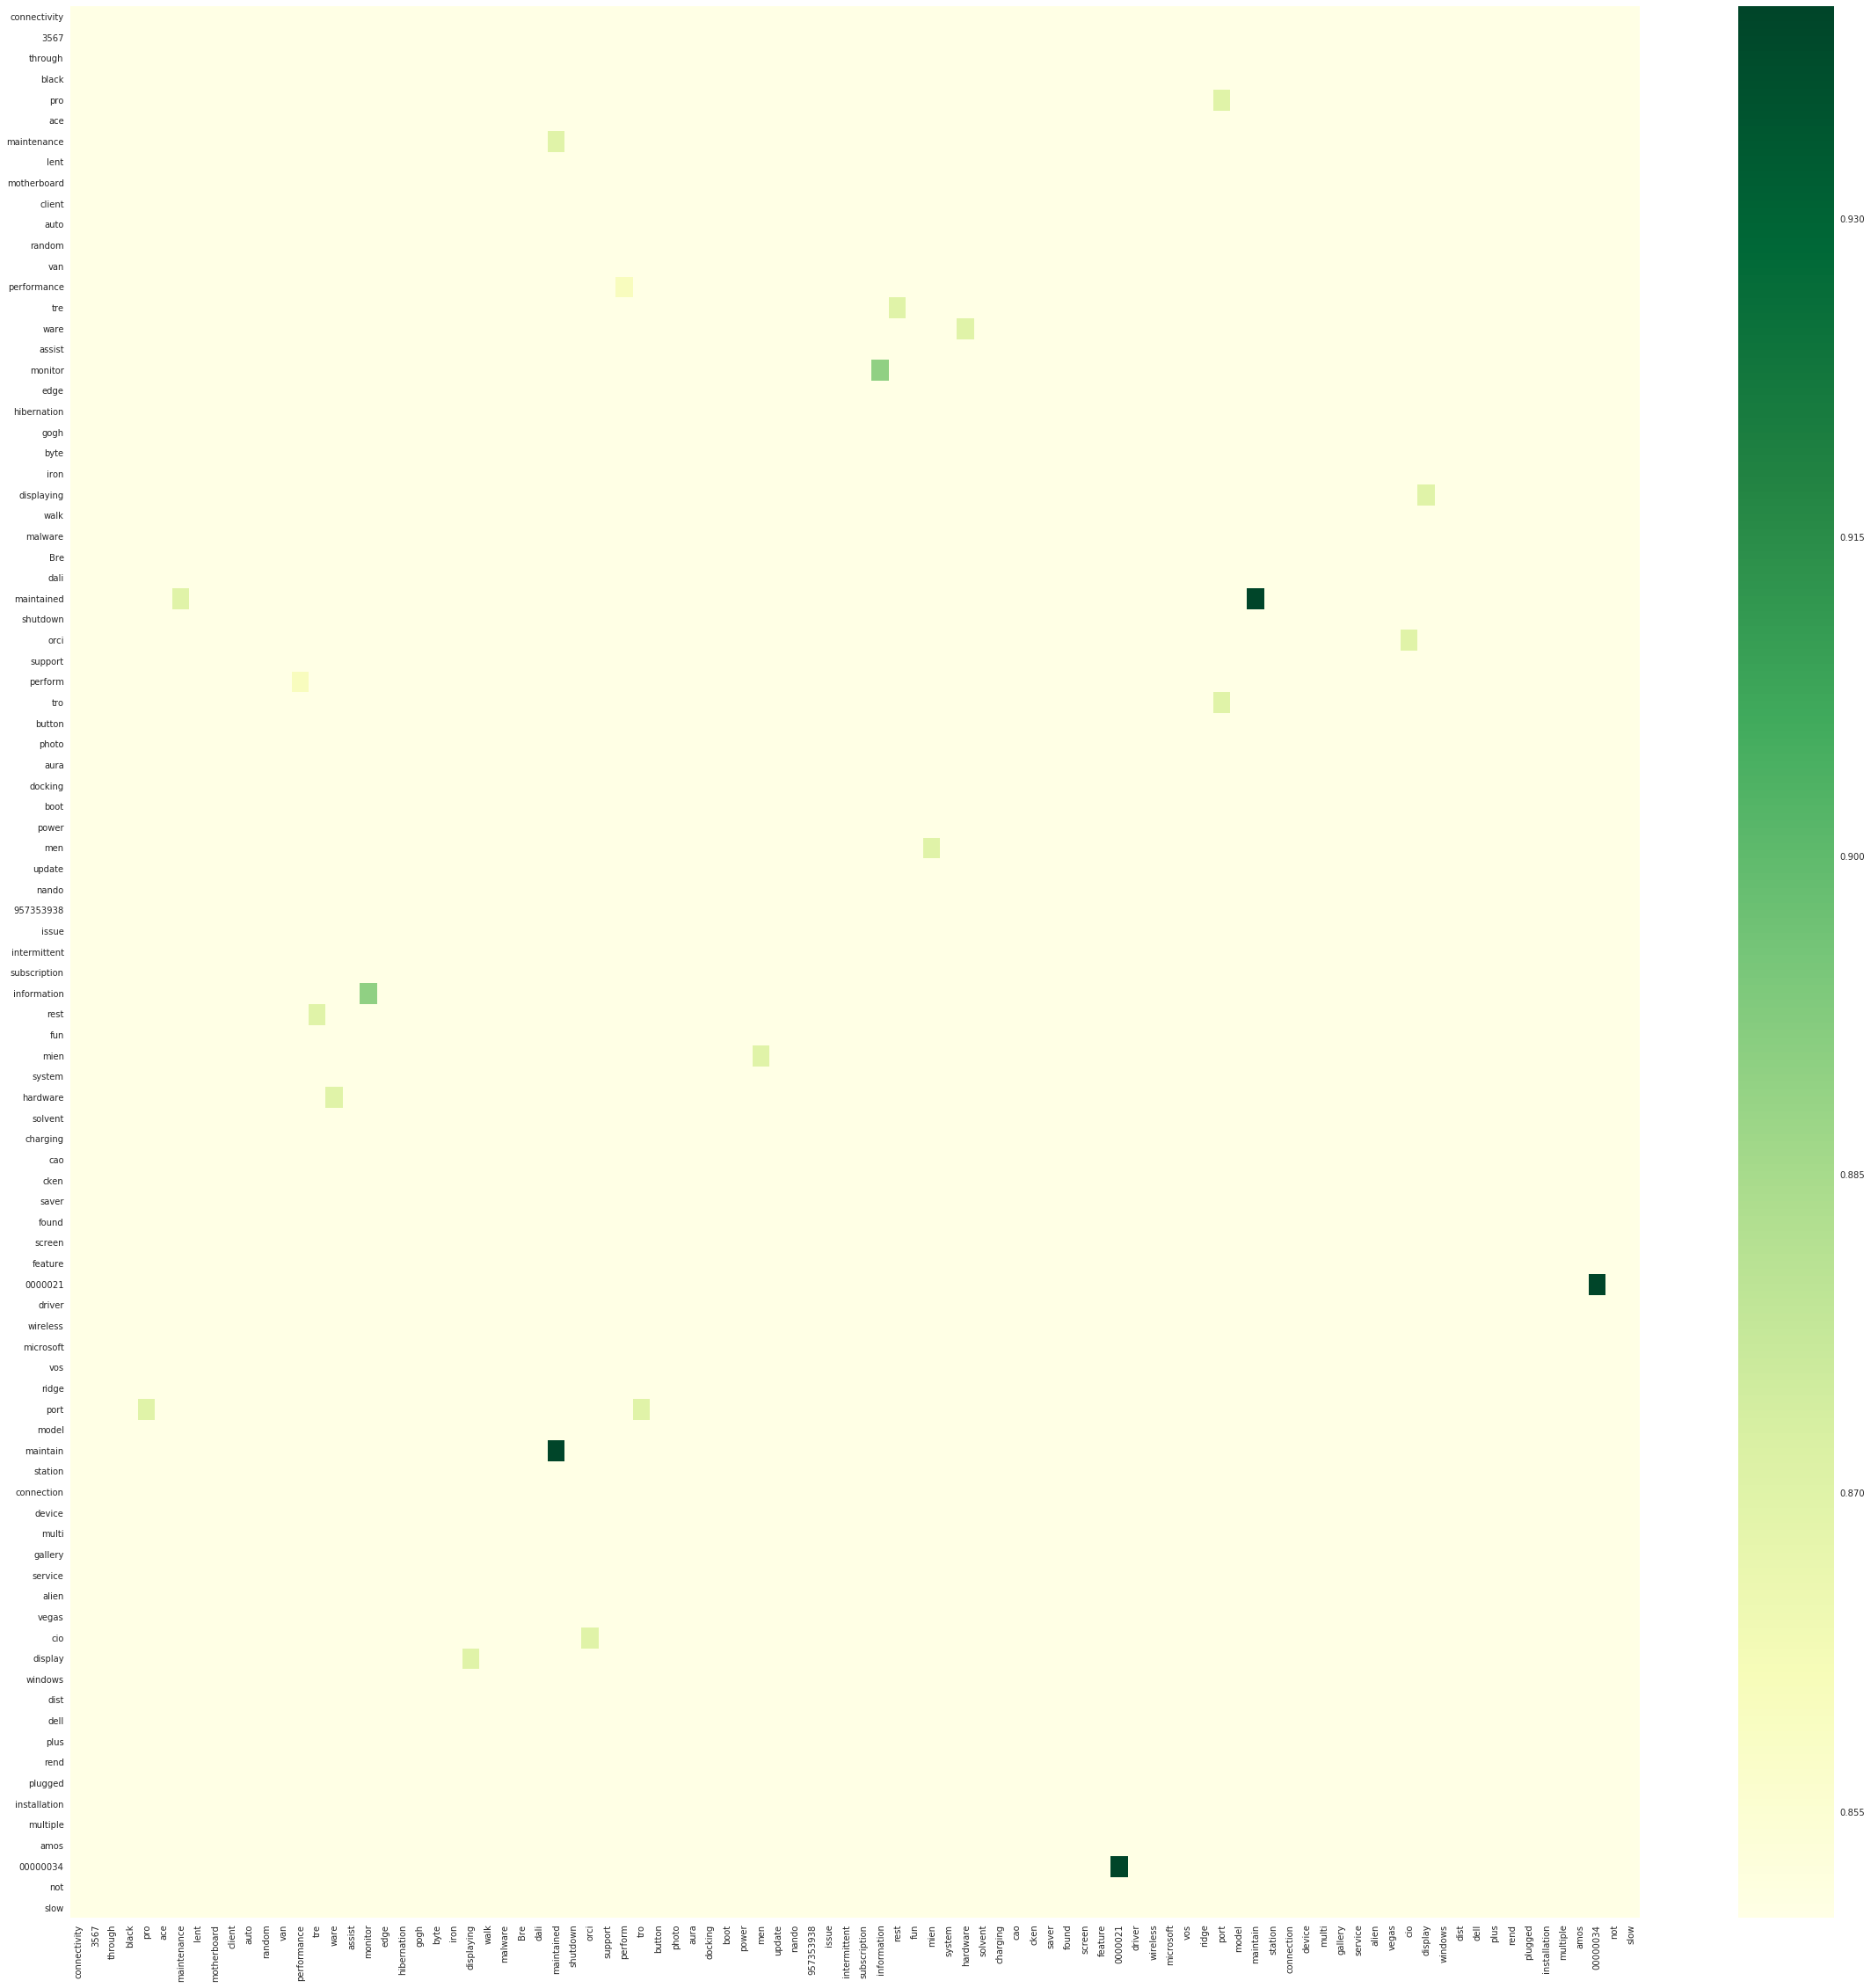

In [116]:
plt.figure(figsize=(40,40))
sns.heatmap(df_test2,cmap='YlGn',vmin=0.85)

In [117]:
xd=[]
for i in x:
    if i not in wordlists:
        xd.append(i)

In [118]:
len(x)-len(xd)

87

In [125]:
xt  = [spell(i) for i in word_notin_list if len(i)<9]

In [126]:
len(xt)

833

In [127]:
xdt=[]
for i in xt:
    if i not in wordlists:
        xdt.append(i)

In [128]:
print('not found',len(xt)-len(xdt))

not found 381


In [129]:
print(xdt)

['hw', 'wk', '100', '123', '141', '200', '360', '365', '390', '404', '500', '615', '636', '990', 'ACL', 'alw', 'att', 'Avs', 'BEP', 'cfi', 'clk', 'cps', 'cto', 'DFS', 'dph', 'DPW', 'DSA', 'DTC', 'EdB', 'Gex', 'gtt', 'LRB', 'MEC', 'MGk', 'MSD', 'MSO', 'NBP', 'NDB', 'NTO', 'obb', 'obs', 'OOB', 'oos', 'PDI', 'PMC', 'PNP', 'POC', 'pps', 'psw', 'RNR', 'rnd', 'rpt', 'RSV', 'SDD', 'SDM', 'SKU', 'SRS', 'STL', 'SXS', 'tdr', 'tpm', 'TSD', 'WKS', 'wos', 'WPS', 'xis', 'xed', '0131', '0132', '0141', '0142', '0145', '0146', '0151', '0155', '0511', '0620', '0716', '1010', '10x3', '15r2', '1707', '1709', '1803', '2000', '2003', '2007', '2010', '2013', '2016', '2017', '2018', '2420', '2520', '3010', '3020', '3030', '3040', '3046', '3050', '3162', '3168', '3250', '3268', '3340', '3350', '3379', '3380', '3420', '3421', '3440', '3442', '3446', '3450', '3458', '3460', '3468', '3470', '3480', '3510', '3520', '3540', '3542', '3543', '3546', '3550', '3558', '3559', '3560', '3565', '3567', '3568', '3580', '362

In [131]:
print(list(set(xt)))

['x30s', 'report', 'chaksi', '5568', 'gun', 'add', 'Tidwell', 'll', 'sysexg', '3480', 'insp7373', 'hen', '7040', 'e7440', 'ex', 'qi', 'can', 'Essa', 'slower', 'carga', 'war', '2520', '3050', 'ring', 'work', 'x300', 'NBP', 'cloud', 'Kateri', '2018', 'exc', 'name', 'edge', '5250', 'bit', 'wme22', 'glare', 'corrals', '7568', 't3500', 'halo', 'wk', 'NDB', 'off', '5179', '7810', '3420', '5566', 'donor', 'pre', 'beeps', 'up', 'POC', 'v515', 'wrist', 'm7710', '5567', 'e5440', 'hardwire', 'maestra', '7378', 'bonds', 'Valida', 'psoas', 'm1004', 'sob', 'Irl', 'cfi', 'initial', 'when', 'blrcsmb', 'he', 'sendpart', 'din', 'Ino', 'map', '2420', 'liquid', 'sr', '7350', '5570', '7270', 'well', 'specify', 'cleaner', 'wd15', 'said', 'osteo', 'd', '500', '3558', '7567', 'Issie', 'torii', '3468', '3030', '2003', '3010', 'alw', 'inca', 'ca', '2000', '3470', 'k', 'imp', 'readily', 'under', 'wm615', '73qw872', 'e5570', 'e7450', '3580', '7779', 'nook', 'desex', 'multiton', 'screen', 'howso', 'logout', 'x3cc'

In [132]:
spell('entender')

'entender'

In [134]:
df.X_ISP_SR_TITLE.map(len).min()

1

In [152]:
temp = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

In [155]:
temp.sum().sort_values()

zooming              2
c0312                2
internment           2
c0427                2
socket               2
c0908                2
sola                 2
c21                  2
integrity            2
ca                   2
int                  2
c0302                2
cac                  2
inspirion            2
insp7373             2
insider              2
calentamiento        2
inkjet               2
initialize           2
solventamos          2
cambio               2
camcorder            2
vario                2
inspiron3567         2
c0228                2
interrupt            2
intervention         2
jm                   2
viper                2
jim                  2
                 ...  
battery           3755
scam              3759
harddrive         3784
password          3860
connect           4028
lcd               4218
printer           4236
bluescreen        4289
internet          4353
email             4410
work              4432
audio             4442
screen     